## Overview

Tujuan dari proyek ini adalah untuk menerapkan Exploratory Data Analysis (EDA) untuk mengidentifikasi fitur mana yang paling mempengaruhi harga rumah di "Melbourne Housing Market".

Dataset : https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# Read data
ds = pd.read_csv('Melbourne_housing_FULL_22_05_2018.csv')

In [3]:
# Number of rows and columns
print("(rows, columns) =", ds.shape)

# View first few records
ds.head()

(rows, columns) = (34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## VARIABLE TYPES

### Categorical Variables

Berdasarkan informasi di bawah ini, variabel berikut: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' perlu ditentukan sebagai "category" dibandingkan "general object. Selain itu, variabel 'date' perlu diubah menjadi "object".

In [4]:
# View data types
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Identify object columns
print(ds.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    ds[colname] = ds[colname].astype('category')  

In [7]:
# Convert to date object
ds['Date'] = pd.to_datetime(ds['Date'])

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_3364\3644695315.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ds['Date'] = pd.to_datetime(ds['Date'])


### Numeric Variables

Ringkasan statistik dari variabel numerik di atas menunjukkan bahwa 'Postcode' diperlakukan sebagai "numeric" dimana harusnya diidentifikasi sebagai "categorial". Fitur ini perlu dikonversi ke tipe data yang benar.

In [8]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [9]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

for colname in num_cats:
    ds[colname] = ds[colname].astype('category')   

# Confirm changes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

### Duplicate Variables

Menurut dokumentasi kumpulan data, 'Rooms' dan 'Bedroom2' sama-sama berisi informasi jumlah kamar yang dimiliki suatu rumah, namun dilaporkan dari sumber yang berbeda. Saya akan menyelidiki kolom ini lebih lanjut untuk menentukan apakah kolom tersebut harus dihapus dari kumpulan data

In [10]:
# Examine Rooms v Bedroom2
ds['Rooms v Bedroom2'] = ds['Rooms'] - ds['Bedroom2']
ds

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


> Perbedaan di antara kedua variabel sangat kecil sehingga memakai keduanya hanya menjadikan informasi terduplikasi. Oleh karena itu, variabel 'Bedroom2' akan dihapus seluruhnya dari kumpulan data untuk memungkinkan analisis yang lebih baik. Variabel sementara yang berisi perbedaannya juga akan dihapus.

In [11]:
# Drop columns
ds = ds.drop(['Bedroom2','Rooms v Bedroom2'],1)

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_3364\3713116328.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ds = ds.drop(['Bedroom2','Rooms v Bedroom2'],1)


### Feature Engineering

Pada dataset ini berisi tahun pembangunan rumah. Meskipun hal ini diukur berdasarkan tahun tertentu, variabel yang sebenarnya diteliti adalah usia rumah. Dengan demikian, usia rumah dapat dinyatakan dalam istilah 'historic' (lebih dari 50 tahun) dan 'contemporary' (kurang dari 50 tahun) untuk memahami inti informasi dengan cara yang lebih ringkas sehingga memungkinkan analisis dan visualisasi yang lebih baik.

In [12]:
# Add age variable
ds['Age'] = 2017 - ds['YearBuilt']

# Identify historic homes
ds['Historic'] = np.where(ds['Age']>=50,'Historic','Contemporary')

# Convert to Category
ds['Historic'] = ds['Historic'].astype('category')

## MISSING DATA

Dari pengecekan sekilas pada jumlah entri untuk setiap variabel, tampaknya ada informasi yang hilang dalam kumpulan data. Saya akan menjelajahi fitur mana yang paling banyak kehilangan informasi.

In [13]:
# Number of entries
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

<Axes: >

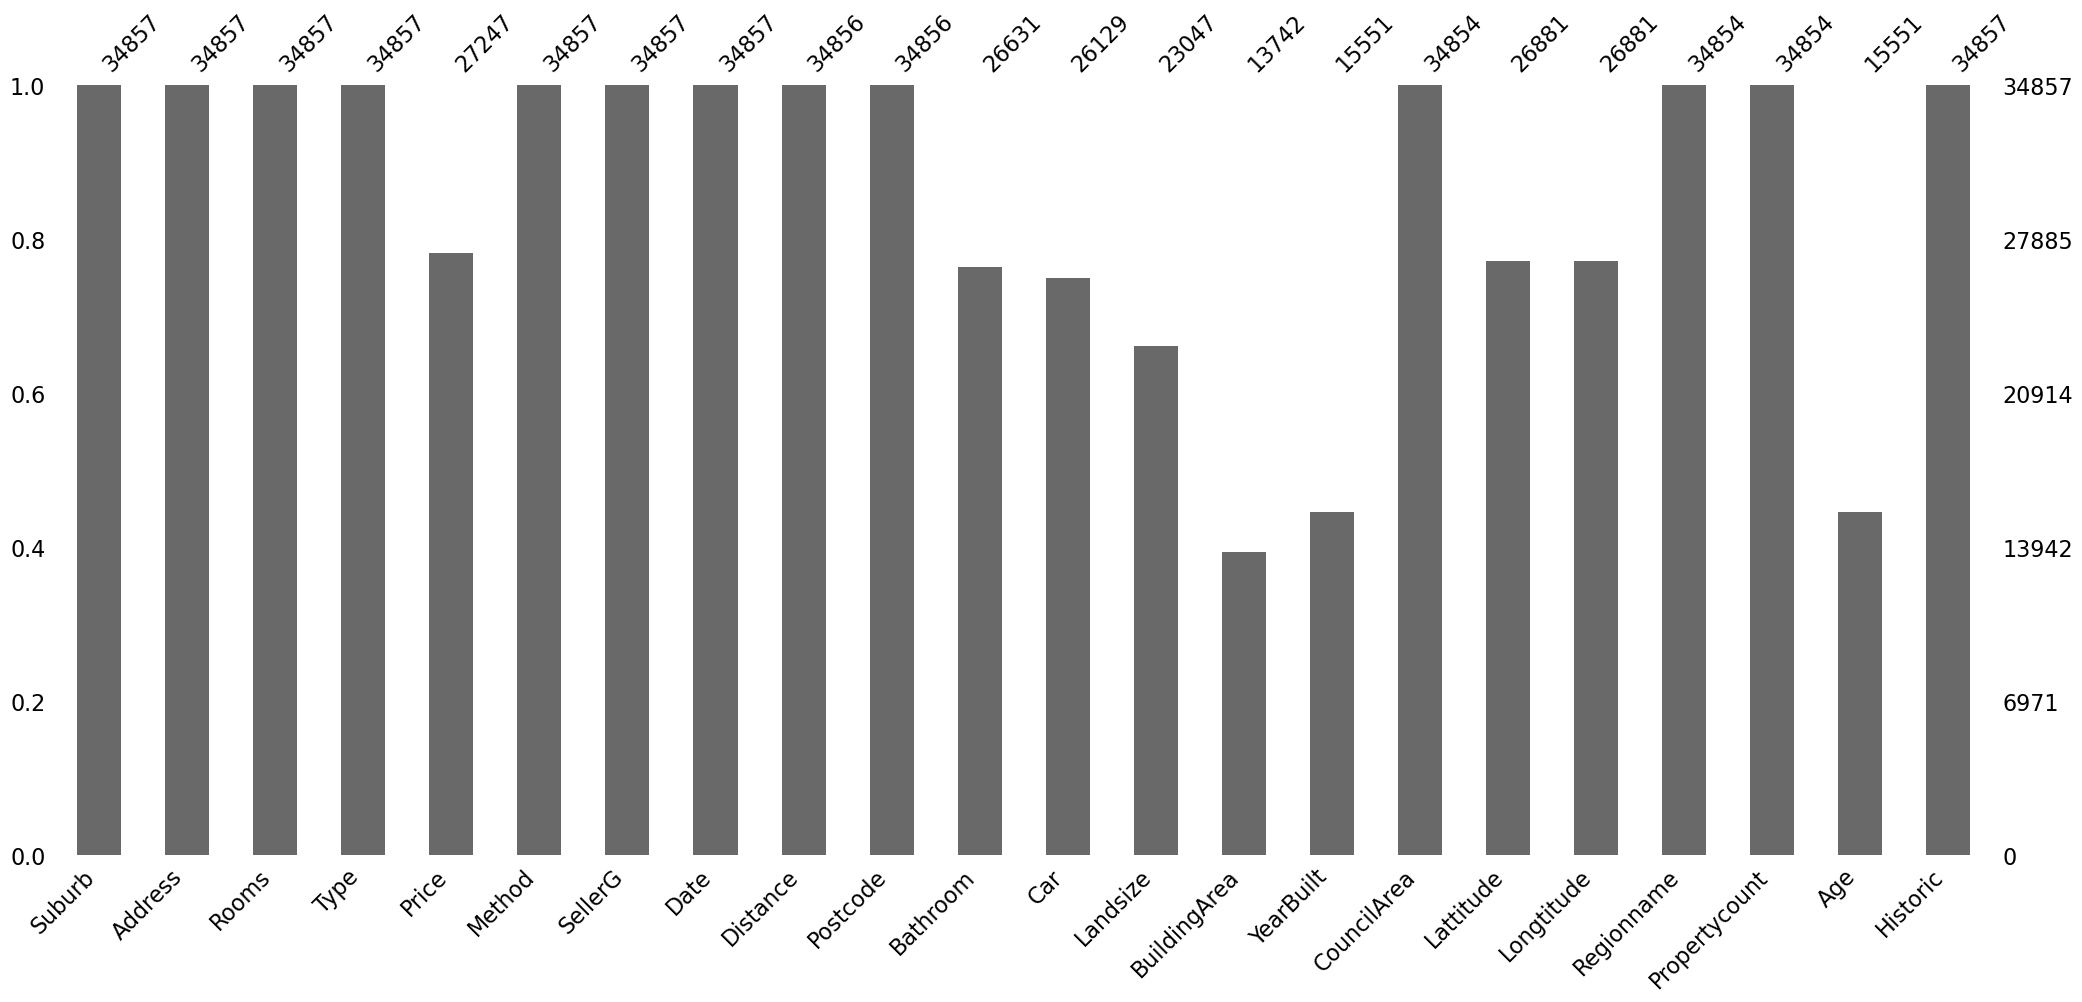

In [14]:
# Visualize missing values
msno.bar(ds)

In [15]:
# Count of missing values
ds.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

In [16]:
# Percentage of missing values
ds.isnull().sum()/len(ds)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

> Ada sejumlah besar nilai yang hilang dalam 'Price', 'Bathroom', 'Car', 'Landsize', 'Building Area', 'YearBuilt', 'Council Area', 'Lattitude', and 'Longitude'. Untuk memungkinkan analisis yang lebih lengkap, variabel yang tidak memiliki data apa pun akan dihapus dari kumpulan data.

In [17]:
# Remove rows missing data
ds = ds.dropna()

# Confirm that observations missing data were removed  
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   category      
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   category      
 10  Bathroom       8887 non-null   float64       
 11  Car            8887 non-null   float64       
 12  Landsize       8887 non-null   float64       
 13  BuildingArea   8887 non-null   float64       
 14  YearBuilt      8887 non-null   float64       
 15  CouncilArea    8887 

## OUTLIERS

Ringkasan statistik yang menunjukkan nilai minimum nol untuk 'Landsize' dan 'BuildingArea' tampak ganjil. Ada juga harga maksimal $8,4 juta di dalam dataset. Pengamatan ini perlu diselidiki lebih lanjut untuk menentukan validitasnya dan apakah harus dimasukkan dalam dataset untuk dianalisis.

In [18]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8887.0,-3.780450e+01,0.090549,-38.17436,-37.85856,-37.7987,-3.774894e+01,-3.740720e+01
Longtitude,8887.0,1.449914e+02,0.118919,144.42379,144.92000,144.9985,1.450646e+02,1.455264e+02


In [19]:
ds[ds['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [20]:
ds[ds['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,17.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,...,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,68.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,...,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,47.0,Contemporary
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,...,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,17.0,Contemporary
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,...,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,17.0,Contemporary
22040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,...,125.0,0.0,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0,15.0,Contemporary
22507,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,...,622.0,0.0,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0,57.0,Historic
22931,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,...,1173.0,0.0,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0,57.0,Historic
22994,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,...,623.0,0.0,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0,97.0,Historic
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,...,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0,52.0,Historic


In [21]:
ds[ds['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,0.0,60.00,1970.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,0.0,50.00,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,9/17 Howitt St,2,u,570000.0,VB,Ray,2017-07-29,2.7,3141.0,...,0.0,64.00,1965.0,Melbourne City Council,-37.84679,145.00206,Southern Metropolitan,14887.0,52.0,Historic
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,2017-07-29,5.0,3182.0,...,0.0,82.00,1930.0,Port Phillip City Council,-37.85911,144.97900,Southern Metropolitan,13240.0,87.0,Historic
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,2017-07-29,12.9,3043.0,...,0.0,66.32,1980.0,Brimbank City Council,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,...,0.0,35.64,1967.0,Hobsons Bay City Council,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


- After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential real estate in which the structure comes up to or very near the edge of the property line. Therefore, these observations are valid and will remain the data set.
- However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to have a size of zero. Also, this observation is priced usually high at $8.4M (the outlier identified earlier), further confirming a possible error in the data point. For these two reasons, this observation will be removed.

Setelah melakukan pengamatan lebih lanjut, dapat disimpulkan bahwa 'Landsize' yang kosong / nol bisa menjadi indikasi rumah 'zero-lot-line' (perumahan yang strukturnya berada pada atau sangat dekat dengan tepi garis properti). Oleh karena itu, observasi ini valid dan akan tetap di dalam dataset.

Namun pengamatan tentang 'BuildingArea' yang kosong / nol akan dihilangkan karena tidak mungkin suatu rumah tidak mempunyai luas / luasnya nol. Selain itu, ada juga bangunan yang dihargai tinggi yaitu $8,4 juta (outlier yang diidentifikasi sebelumnya), semakin mengonfirmasi kemungkinan kesalahan pada titik data. Karena dua alasan ini, pengamatan ini akan dihapus.

In [22]:
# Remove outlier
ds = ds[ds['BuildingArea']!=0]

# Confirm removal
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8842.0,3.096811e+00,0.964072,1.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Price,8842.0,1.092554e+06,679110.471353,131000.00000,641250.000000,900000.0000,1.345000e+06,9.000000e+06
Distance,8842.0,1.118741e+01,6.810991,0.00000,6.400000,10.2000,1.390000e+01,4.740000e+01
Bathroom,8842.0,1.645781e+00,0.722307,1.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,8842.0,1.691812e+00,0.976664,0.00000,1.000000,2.0000,2.000000e+00,1.000000e+01
Landsize,8842.0,5.229755e+02,1062.597994,0.00000,211.000000,477.0000,6.520000e+02,4.280000e+04
BuildingArea,8842.0,1.500694e+02,87.499764,1.00000,100.000000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8842.0,1.965692e+03,37.057287,1196.00000,1945.000000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8842.0,-3.780468e+01,0.090367,-38.17436,-37.858788,-37.7987,-3.774930e+01,-3.740720e+01
Longtitude,8842.0,1.449913e+02,0.118965,144.42379,144.919700,144.9983,1.450645e+02,1.455264e+02


# EXPLORATORY DATA ANALYSIS

## UNIVARIATE

Variabel dependen (atau target) yang kita coba prediksi dalam analisis ini adalah Harga. Variabel ini tampaknya terdistribusi normal dan condong ke kanan. Artinya, sebagian besar rumah bernilai sekitar \\$900 ribu dengan beberapa outlier sekitar \\$8 juta.

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_3364\1824166089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Price'], kde = True,hist_kws=dict(edgecolor="k"))


<Axes: xlabel='Price', ylabel='Density'>

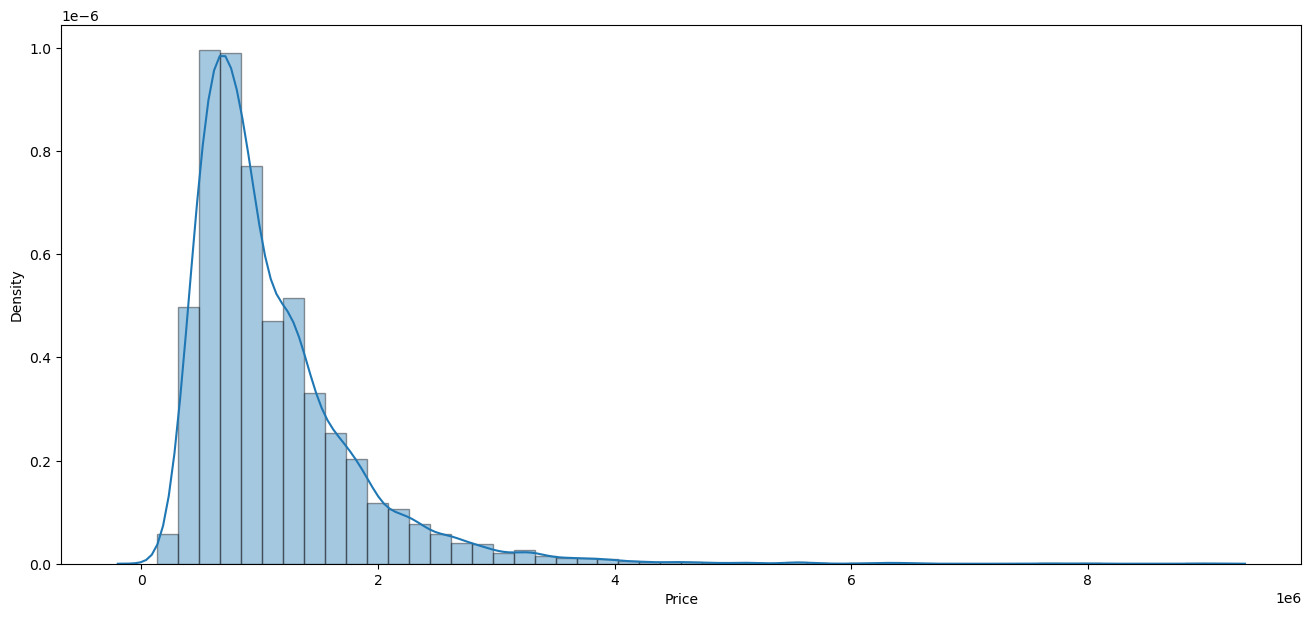

In [23]:
plt.figure(figsize=(16,7))
sns.distplot(ds['Price'], kde = True,hist_kws=dict(edgecolor="k"))

# BIVARIATE

## Categorical Features

Selanjutnya, kita akan melihat hubungan antara variabel target dan fitur kategorikal. 'Suburb', 'Address', dan 'Postcode' adalah ukuran berdasarkan lokasi. Daripada menggunakan semua fitur ini dalam analisis, 'Regionname' akan menjadi proksi lokasi rumah terbaik untuk digunakan dalam analisis yang menyentuh inti informasi dengan lebih ringkas.

Berdasarkan pengetahuan domain, agen real estate atau anggota dewan rumah memiliki pengaruh minimal terhadap harga dibandingkan fitur lainnya dan akan dikeluarkan dari analisis lebih lanjut.

In [24]:
# Identify categorical features
ds.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [25]:
# Abbreviate Regionname categories
ds['Regionname'] = ds['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

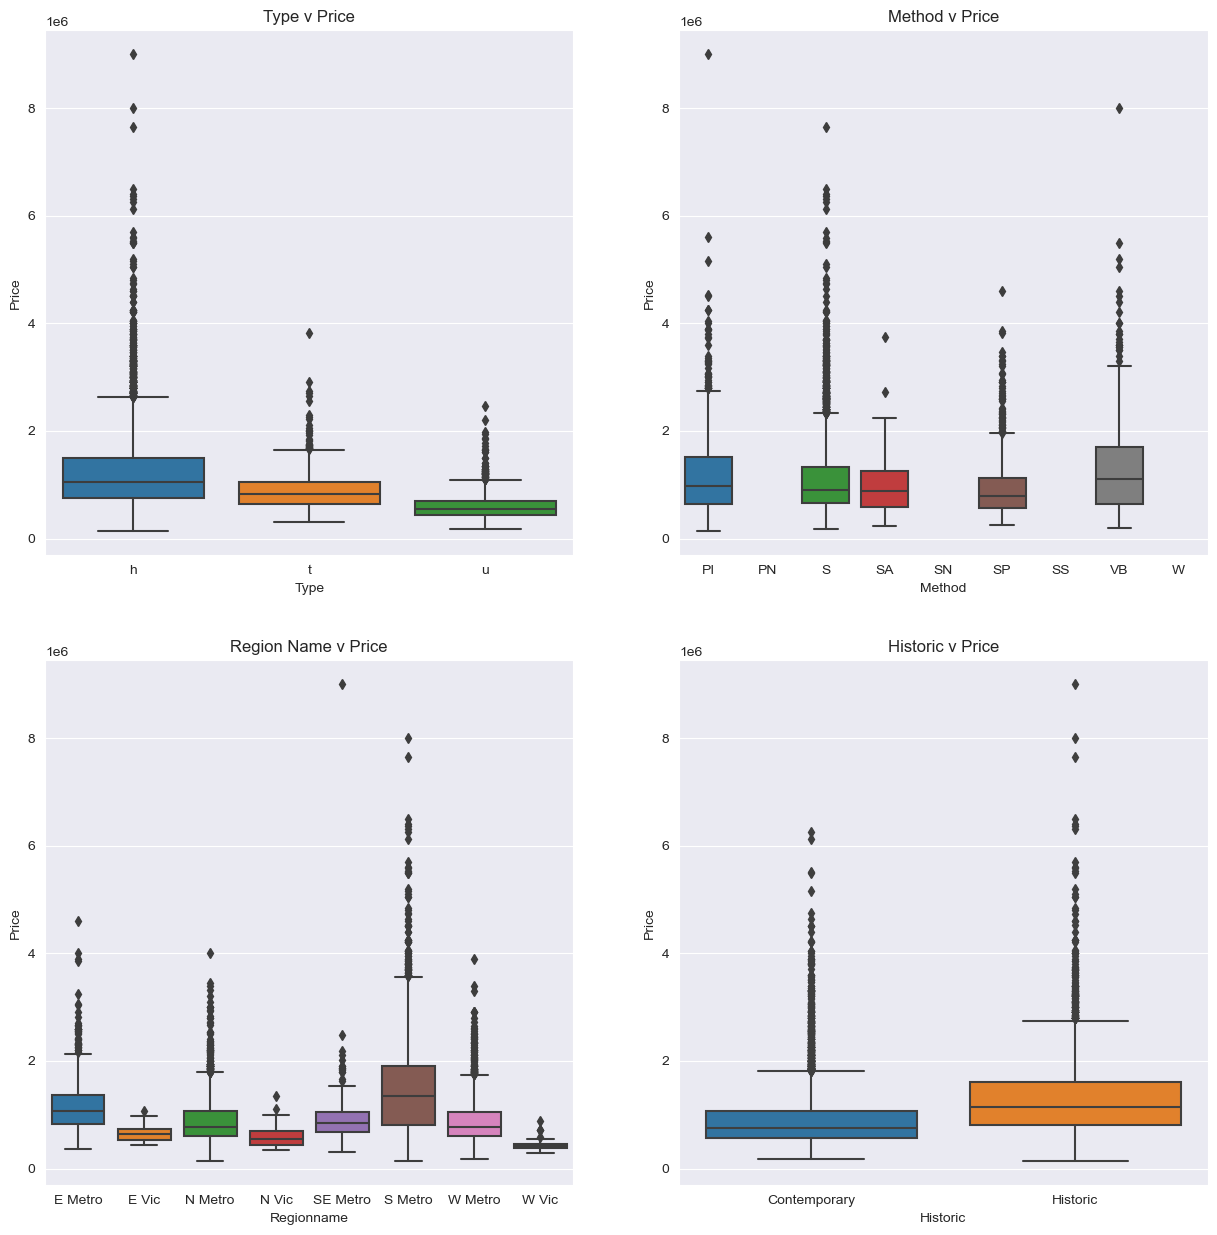

In [26]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = ds, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = ds, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = ds, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = ds, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

## Insights

- Harga rata-rata untuk 'houses' sekitar \\$1M, 'townhomes' sekitar \\$800k - \\$900k dan 'units' sekitar \\$500k.

- Harga rumah relatif sama walaupun dengan metode penjualan yang berbeda secara keseluruhan.

- Harga rata-rata rumah di 'Metropolitan Region' lebih tinggi dari 'Victoria Region', dengan 'Southern Metro' menjadi area dengan harga rata-rata rumah tertinggi (~//$1.3M).

- Dengan harga rata-rata \\$1M, rumah 'historic' (rumah dengan umur lebih tua dari 50 tahun) dihargai jauh lebih tinggi daripada rumah baru di wilayah tersebut, namun memiliki variasi harga yang lebih banyak.

## Numeric Features

Selanjutnya, kita akan memvisualisasikan hubungan antara fitur numerik dalam kumpulan data dan harga.

In [27]:
# Identify numeric features
ds.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

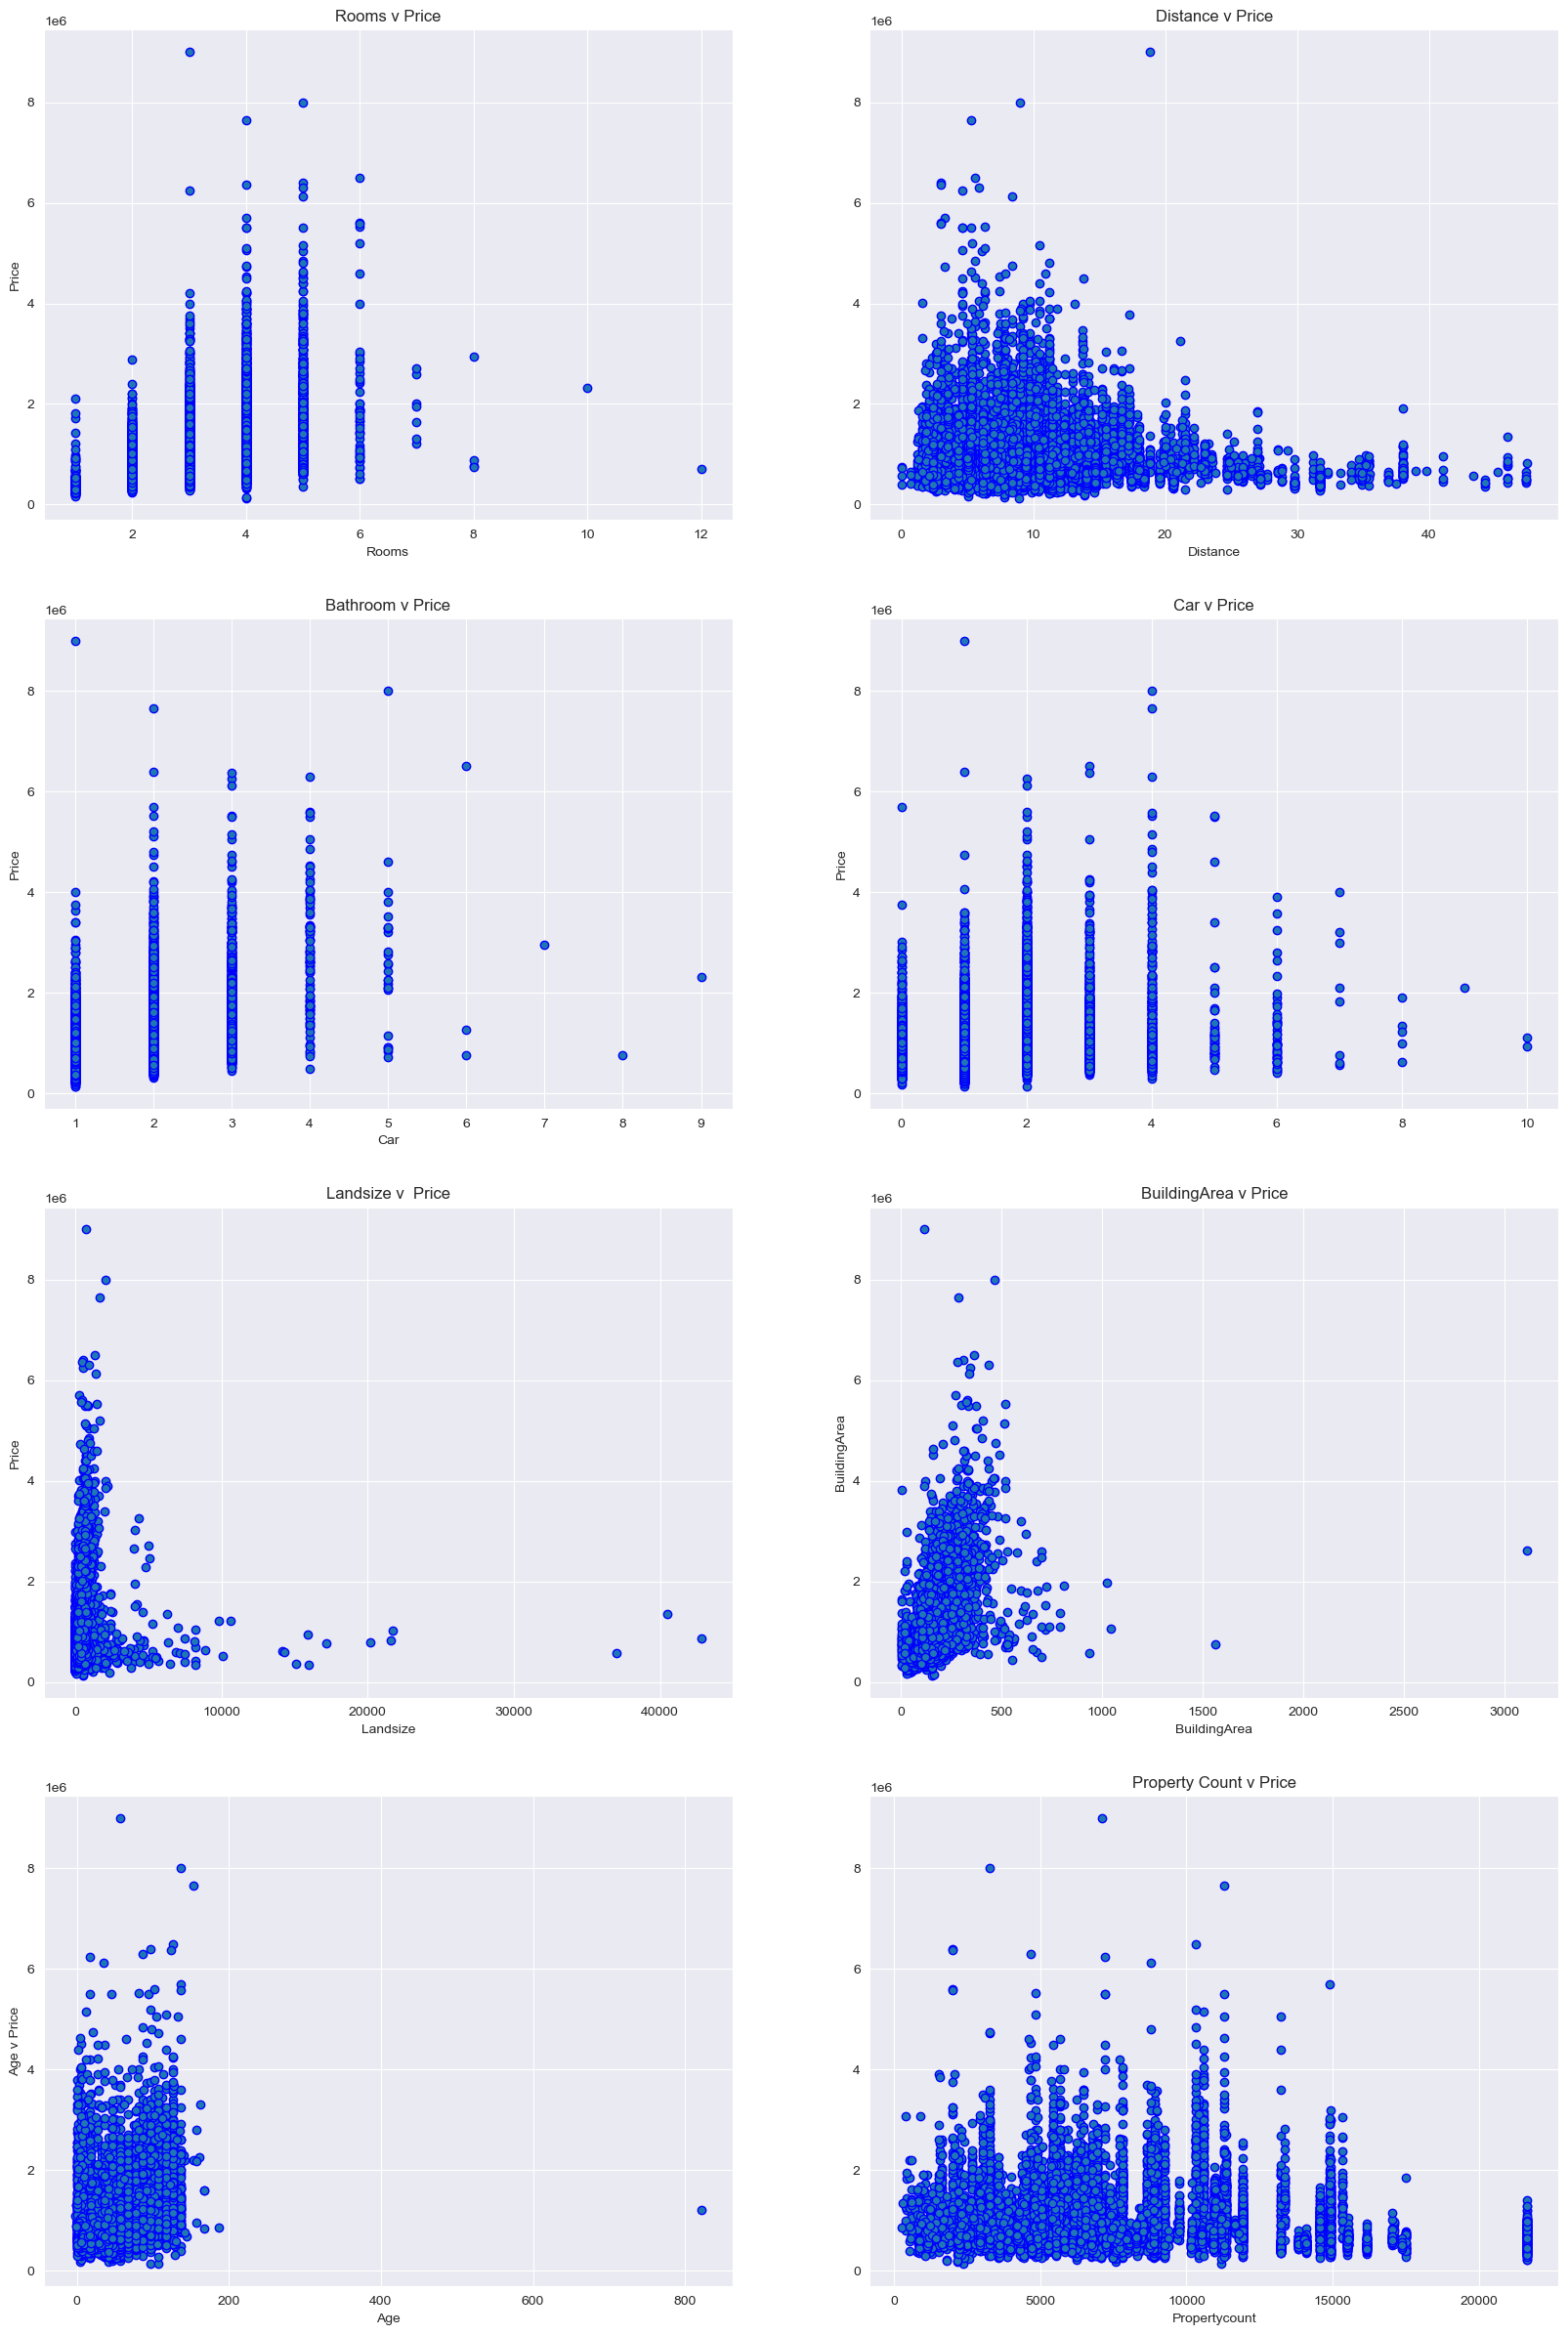

In [28]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = ds, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = ds, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = ds, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = ds, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = ds, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = ds, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = ds, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = ds, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

### Insights

- Mayoritas rumah dalam kumpulan data memiliki 4 atau 5 kamar.
- Tren yang paling menonjol adalah adanya korelasi negatif antara jarak dari Central Business District (CBD) Melbourne dan Harga. Rumah paling mahal ($2 juta atau lebih) cenderung berada dalam jarak 20 km dari CBD.

## CORRELATION

Selanjutnya, kita akan mengeksplorasi bagaimana semua variabel berkorelasi satu sama lain.

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_3364\3261508867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})


Text(0.5, 1.0, 'Variable Correlation')

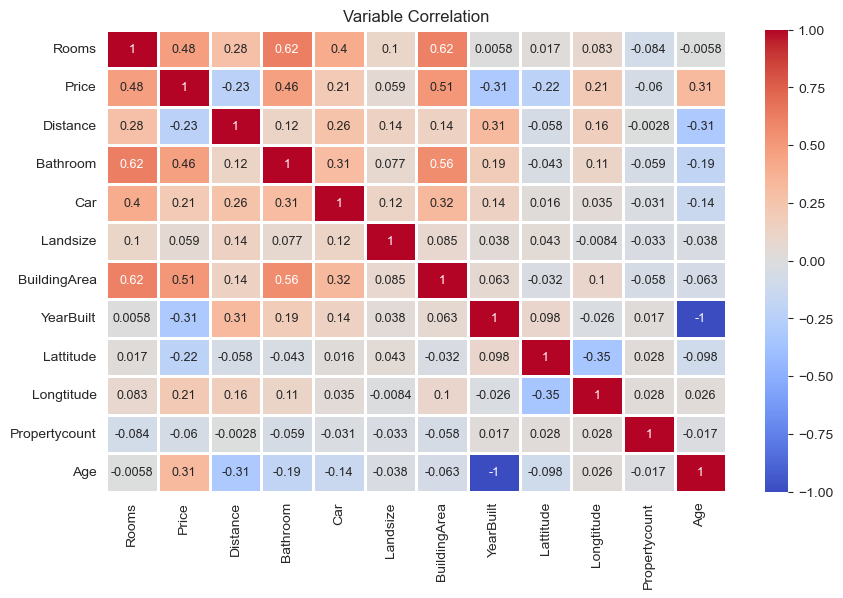

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(ds.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

**Weak Positive Correlation** <br>
'Age' dan 'Price'

**Moderate Positive Correlation** <br>
'Rooms' dan 'Price' <br>
'Bathrooms' dan 'Price' <br>
'Building Area' dan 'Price' <br>

Fitur 'Rooms', 'Bathroom', and 'BuildingArea' juga cukup berkorelasi satu sama lain karena semuanya merupakan termasuk ukuran rumah.

In [30]:
# Identify numeric features
ds.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [31]:
# Split
# Create features variable 
X =ds[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable
y = ds['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [32]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

### Regression Evaluation Metrics
Three common evaluation metrics for regresson problems:

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)<br>
All basic variations on the difference between what you predicted and the true values.<br>

Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error. <br>
**MSE** more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .<br>

All of these are loss functions, because we want to minimize them.

In [34]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 312564.4667067027
MSE: 221083216258.25726
RMSE: 470194.8705146168


> RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $508,212.42 away from the actual value.

In [35]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5216286297986981


> According to the R-squared, 47.6% of the variance in the dependent variable is explained by the model.

### Analyze the Residuals

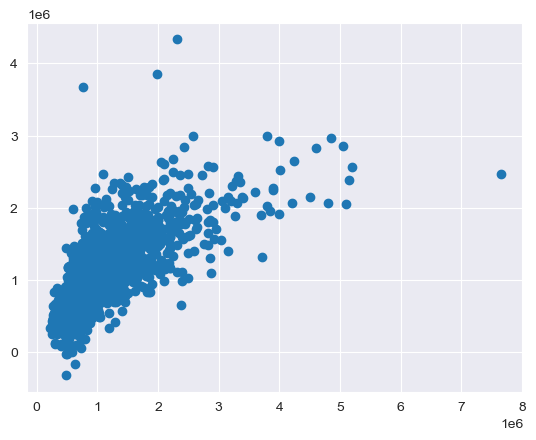

In [36]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

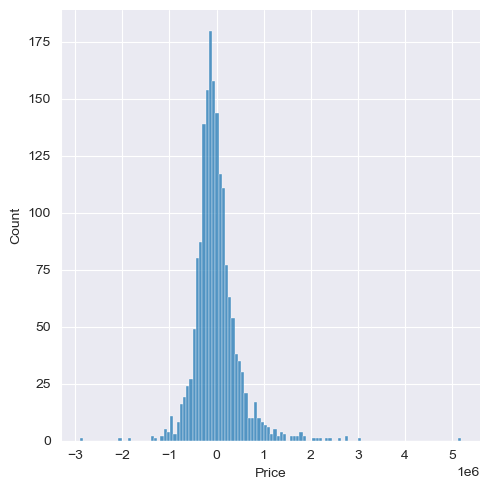

In [37]:
# Histogram of the distribution of residuals
sns.displot(y_test - y_pred)

### Interpreting the Cofficients

In [38]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,130781.994615
Distance,-28481.473952
Bathroom,255950.485267
Car,49936.398377
Landsize,24.128532
BuildingArea,2160.118289
Propertycount,-1.229619
Age,5491.481614
